# Clustering Analysis - PCA + kMeans
- **Created by Andrés Segura-Tinoco**
- **Created on May 19, 2022**

## Loading main libraries and data

In [1]:
# Load the Pandas libraries
import pandas as pd
import numpy as np

In [2]:
# Load scikit-learn libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Interact libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
# Read dataset from disk
dataURL = "../../../data/dataset_full.csv"
raw_data = pd.read_csv(dataURL)
print(raw_data.shape)

(1332, 7256)


In [6]:
raw_data.head()

,$number$,a,a4,abajo,abandonada,abandonado,abandonados,abandono,abarata,abarcan,...,kw_ya_que,struc_modal_auxiliary,struc_text_length,struc_text_position,struc_token_count,struc_avg_word_length,struc_punct_marks_count,synt_parse_tree_depth,synt_sub_clauses_count,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.022751,0.000000,0.012270,0.272727,0.000000,0.048780,0.015625,spam
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.065150,0.000000,0.055215,0.272727,0.043478,0.219512,0.078125,claim
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.111111,0.130300,0.000000,0.128834,0.272727,0.086957,0.146341,0.117188,premise
3,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.062048,0.047619,0.049080,0.363636,0.043478,0.146341,0.054688,claim
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.002068,0.000000,0.006135,0.181818,0.086957,0.000000,0.000000,spam


In [7]:
# Function that obtains the numerical data from the data frame
def getNumericalData(df):
    num_df = pd.DataFrame()
    
    # Create DataFrame
    for col in df.columns:
        if str(df[col].dtype) in ["int64", "float64"]:
            num_df[col] = df[col]
    
    return num_df

In [8]:
# Get only numeric columns/variables
num_data = getNumericalData(raw_data)
print(num_data.shape)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_8088/1727221646.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  num_df[col] = df[col]


(1332, 7255)


In [9]:
num_data.head()

,$number$,a,a4,abajo,abandonada,abandonado,abandonados,abandono,abarata,abarcan,...,kw_visto_que,kw_ya_que,struc_modal_auxiliary,struc_text_length,struc_text_position,struc_token_count,struc_avg_word_length,struc_punct_marks_count,synt_parse_tree_depth,synt_sub_clauses_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.022751,0.000000,0.012270,0.272727,0.000000,0.048780,0.015625
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.065150,0.000000,0.055215,0.272727,0.043478,0.219512,0.078125
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.111111,0.130300,0.000000,0.128834,0.272727,0.086957,0.146341,0.117188
3,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.062048,0.047619,0.049080,0.363636,0.043478,0.146341,0.054688
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.002068,0.000000,0.006135,0.181818,0.086957,0.000000,0.000000


## Apply PCA with Standardization

In [10]:
# Function that apply Principal Component Analysis
def apply_pca(data, std, n):
    
    # Standardize the Data
    if std == True:
        X = StandardScaler().fit_transform(data.values)
    else:
        X = data.values
    
    # Create a DataFrame from PCA
    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(X)
    pca_variance = pca.explained_variance_ratio_
    components = ["PC"+str(i) for i in range(1, len(pca_variance)+1)]
    pca_df = pd.DataFrame(data=pca_data, columns=components)
    
    return pca_df, pca_variance

In [11]:
# Apply the PCA algorithm
min_var = 0.95
pca_df, pca_var = apply_pca(num_data, False, min_var)
n_components = len(pca_df.columns)
print(n_components)

810


In [12]:
# Show the total explained variance ratio of model
print('Explained Variance Ratio:', sum(pca_var) * 100)

Explained Variance Ratio: 95.01325459254306


In [13]:
# Create the PCA data
pca_df = pd.concat([pca_df, raw_data[["label"]]], axis=1)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC802,PC803,PC804,PC805,PC806,PC807,PC808,PC809,PC810,label
0,-1.164060,-0.069563,0.151985,0.195801,-0.104088,0.441369,0.058761,-0.112306,-0.004139,0.013003,...,-0.048169,-0.053117,-0.032265,-0.027763,-0.041062,0.011108,0.024697,-0.010126,-0.024952,spam
1,-0.311263,-0.199701,0.810015,0.540140,-0.920673,0.243345,0.228098,-0.369541,0.069813,0.116217,...,-0.054212,-0.110060,-0.088408,-0.058945,-0.038747,0.039362,-0.004662,-0.090483,-0.029393,claim
2,-0.124422,-0.231020,-0.739091,0.138815,0.258520,0.037944,0.492401,0.018274,-0.043145,-0.161600,...,-0.039788,0.126112,0.053602,-0.006358,0.022935,0.001613,0.085924,0.062241,0.050706,premise
3,-0.765176,-0.049421,0.025430,0.482796,0.425197,-0.190003,0.163052,-0.228852,0.023106,0.066532,...,-0.064764,-0.187304,-0.011264,0.184579,-0.243556,0.030899,-0.034883,-0.022024,-0.175897,claim
4,-1.329017,-0.067418,0.070951,0.030050,-0.245983,0.461533,-0.164240,0.161236,-0.013799,0.203501,...,-0.016564,-0.015201,0.013751,-0.000534,-0.000784,-0.006372,0.022294,-0.008888,0.004404,spam


## PCA Variance Ratio

In [14]:
# Create horizontal bar chart data
bars = tuple(pca_df.columns[:n_components])
y_pos = np.arange(len(bars))
values = pca_var * 100
cum = np.cumsum(values)

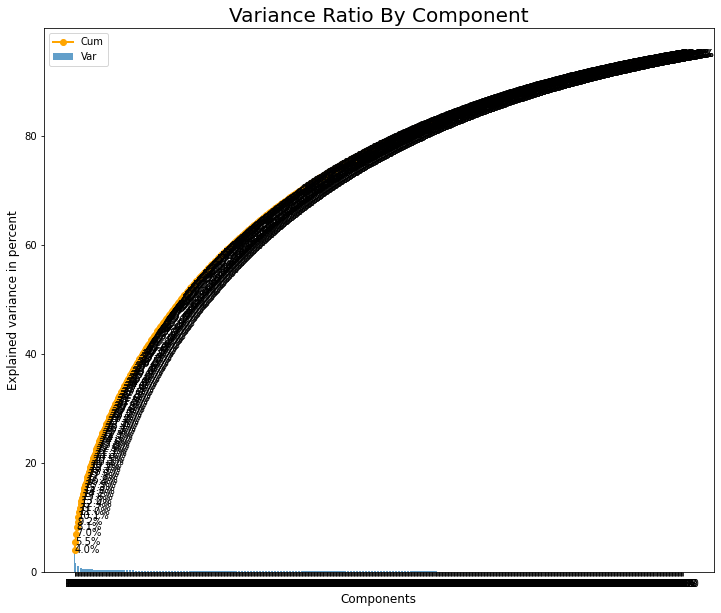

In [15]:
# Set up the matplotlib figure
fig, ax2 = plt.subplots(figsize=(12, 10))

plt.bar(y_pos, values, align="center", alpha=0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color="orange", linewidth=2, marker="o")

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i-.15, v-0.5, (str(round(v, 1))+"%"), color="black", fontweight="normal", fontsize=10)

# Plot setup
plt.xlabel("Components", fontsize=12)
plt.ylabel("Explained variance in percent", fontsize=12)
plt.legend(("Cum", "Var"), loc="best")
plt.title("Variance Ratio By Component", fontsize=20)
plt.show()

## Clustering: K-Means

In [16]:
# Getting the values and plotting it
X = pca_df.iloc[:,:-1].values
y = pca_df.iloc[:,-1].values

In [17]:
# Calculating the Jambu Elbow
k_range = range(1, 20)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


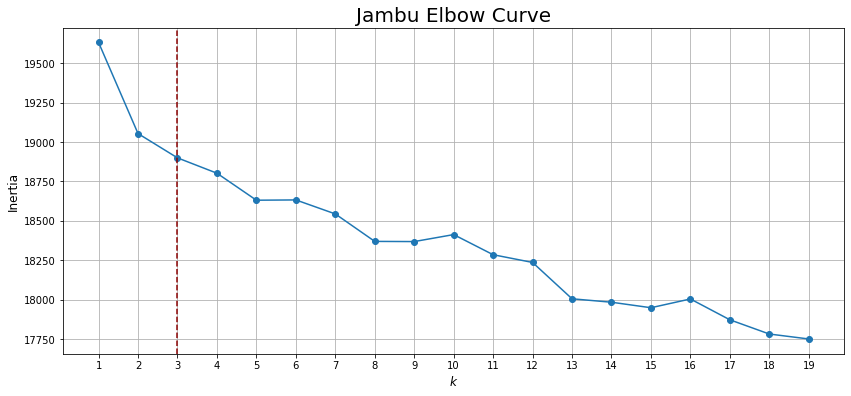

In [18]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(k_range, inertias, marker='o')
plt.axvline(x=3, color="#8b0000", linestyle="--")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.title("Jambu Elbow Curve", fontsize=20)
plt.grid(True)
plt.show()

### Compare results with K-means grouping

In [19]:
# Create scatter plot with K-Means data
def plot_kmeans_data(data, k_clusters, centroids, clusters):
    fig, ax = plt.subplots(figsize=(14, 14))
    
    # Plotting vars
    colors = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    n_data = len(data)
    
    # Create scatter plot
    for i in range(k_clusters):
        points = np.array([data[j] for j in range(n_data) if clusters[j] == i])
        sns.scatterplot(ax=ax, x=points[:, 0], y=points[:, 1], size=5, color=colors[i])
    plt.scatter(centroids[:, 0], centroids[:, 1], s=20, color="black", marker="D")
    
    # Plot setup
    ax.set_xlabel("PC 1", fontsize=12)
    ax.set_ylabel("PC 2", fontsize=12)
    ax.set_title("Argumentative Annotations - Clustering results", fontsize=20)
    ax.legend(["Cluster " + str(i) for i in range(1, k_clusters+1)])
    ax.grid()

In [20]:
# Calculates the K-Means for (x, y) dataset
def run_kmeans(k_clusters):
    kmeans = KMeans(n_clusters=k_clusters, algorithm="elkan", random_state=42)
    kmeans = kmeans.fit(X)
    
    # Getting the cluster labels
    clusters = kmeans.predict(X)
    
    # Centroid values
    centroids = kmeans.cluster_centers_
    
    # Plotting K-Means result
    plot_kmeans_data(X, k_clusters, centroids, clusters)

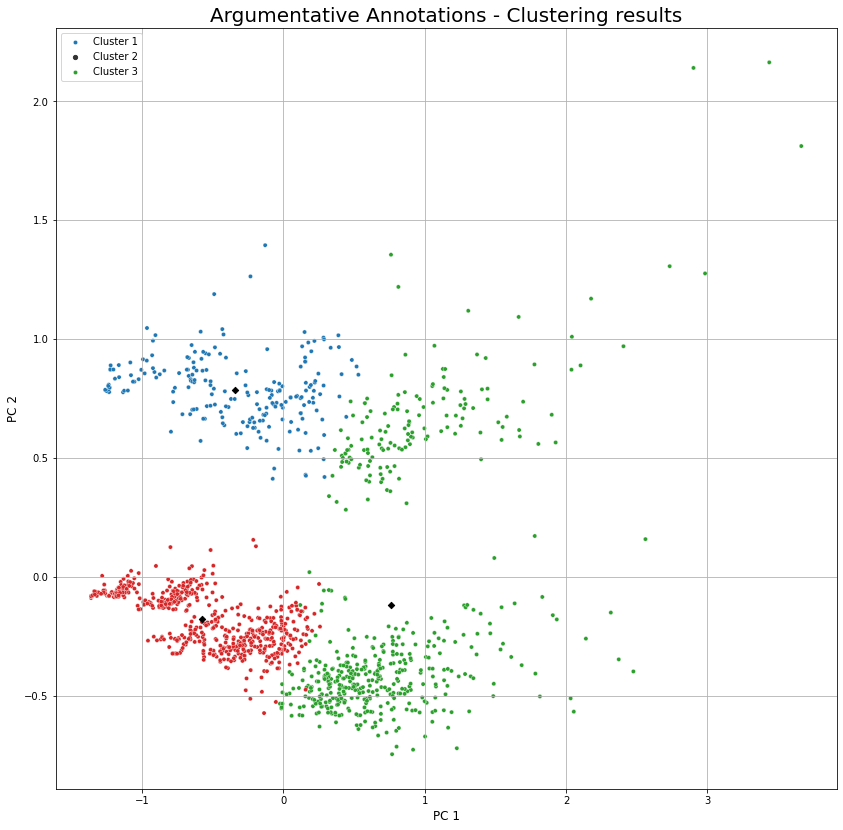

In [21]:
# Create interactive control to control k value
# interactive(run_kmeans, k_clusters = widgets.IntSlider(min=1, max=7, step=1, value=3))
run_kmeans(k_clusters=3)

### Compare results with natural grouping

In [22]:
# Palette by positions dictionary
color_palette = dict()
color_palette["majorclaim"] = "#dc3912"
color_palette["claim"] = "#3366cc"
color_palette["premise"] = "#ff9900"
color_palette["spam"] = "#109618"

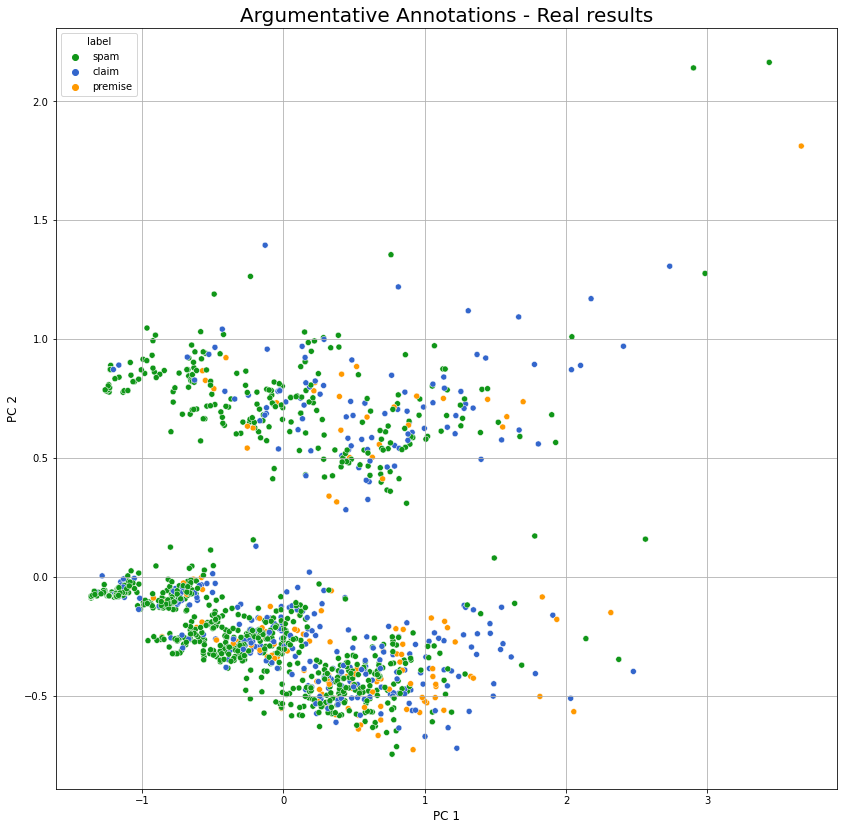

In [23]:
# Create scatter plot with players label
fig, ax = plt.subplots(figsize=(14, 14))

# Create 2D scatter plot
plot = sns.scatterplot(ax=ax, data=pca_df, x="PC1", y="PC2", hue="label", palette=color_palette)

# Plot setup
ax.set_xlabel("PC 1", fontsize=12)
ax.set_ylabel("PC 2", fontsize=12)
ax.set_title("Argumentative Annotations - Real results", fontsize=20)
ax.grid()

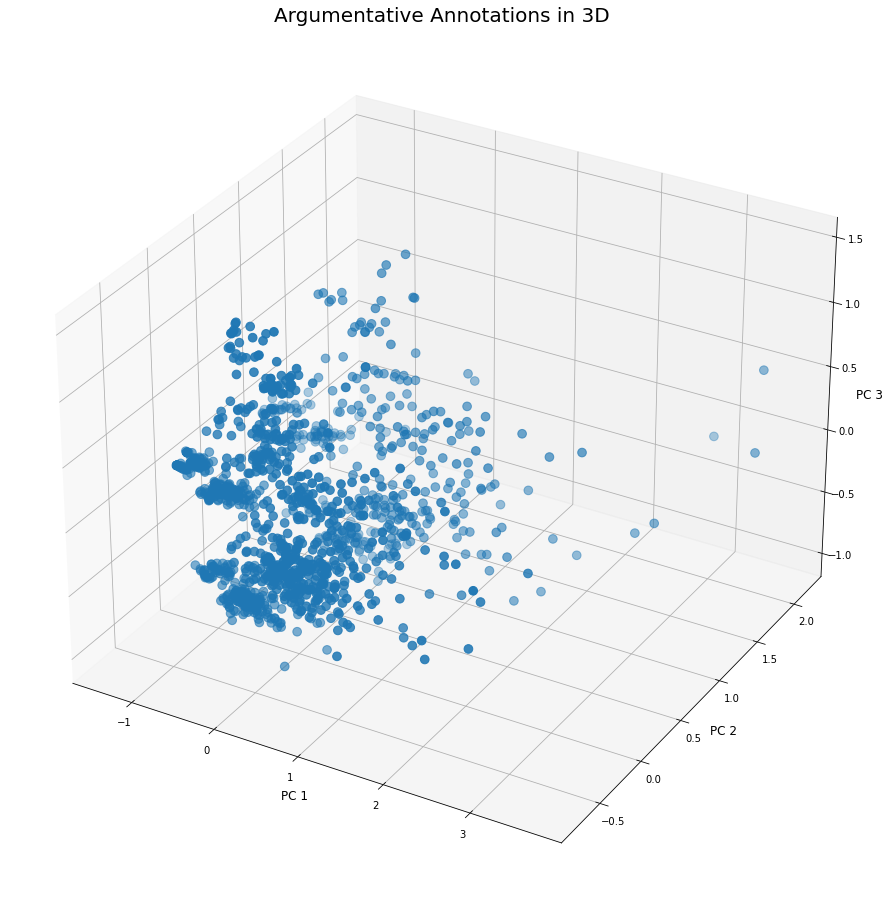

In [24]:
# Create 3D scatter plot
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection="3d")

# Get (x, y, z) axis values
xx = pca_df.loc[:,["PC1"]].values
yy = pca_df.loc[:,["PC2"]].values
zz = pca_df.loc[:,["PC3"]].values

# Plot values
ax.scatter(xx, yy, zz, c="#1f77b4", marker="o", s=75)

# Plot setup
ax.set_xlabel("PC 1", fontsize=12)
ax.set_ylabel("PC 2", fontsize=12)
ax.set_zlabel("PC 3", fontsize=12)
ax.set_title("Argumentative Annotations in 3D", fontsize=20)
ax.grid()

---
<a href="https://ansegura7.github.io/DataScience_FIFA19Data/">&laquo; Home</a>